In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import datetime
import pickle


# 데이터 읽기 및 전처리

cond1_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition1.csv")
cond1_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition1.csv")
cond1_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition1.csv")
cond1_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition1.csv")



cond2_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition2.csv")
cond2_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition2.csv")
cond2_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition2.csv")
cond2_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition2.csv")

cond3_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition3.csv")
cond3_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition3.csv")
cond3_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition3.csv")
cond3_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition3.csv")

# 데이터 읽기 및 전처리
df_topic_day = pd.read_csv("../../R/data/topic_day_panel.csv")



전처리

In [2]:
#original dataset pp
df_topic_day = df_topic_day[df_topic_day['tag'] != '.net']
df_topic_day = df_topic_day[['date', 'tag', 'q_count', 'treat',	'rel_week']]
df_topic_day.columns = ['cdate', 'sede_tag', 'sede_q_count', 'treat', 'rel_week']

df_topic_day['rel_week'] = pd.Categorical(df_topic_day['rel_week'])
df_topic_day['cdate'] = pd.to_datetime(df_topic_day['cdate'])

df_topic_day  = df_topic_day.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
df_topic_day = df_topic_day.set_index(['sede_tag', 'cdate'])

In [3]:
df_topic_day

sede_q_count  treat rel_week
sede_tag            cdate                                   
amazon-web-services 2021-10-06            63      0       -8
                    2021-10-07            50      0       -8
                    2021-10-08            59      0       -8
                    2021-10-09            31      0       -8
                    2021-10-10            27      0       -8
...                                      ...    ...      ...
vue.js              2023-03-10            35      1       14
                    2023-03-11            18      1       14
                    2023-03-12            21      1       14
                    2023-03-13            45      1       14
                    2023-03-14            47      1       14

[15778 rows x 3 columns]

In [4]:
cond1_sede = pd.concat([cond1_treat_0_1
                    , cond1_treat_0_2
                    , cond1_treat_1_1
                    , cond1_treat_1_2], axis = 0)
cond2_sede = pd.concat([  cond2_treat_0_1
                        , cond2_treat_0_2
                        , cond2_treat_1_1
                        , cond2_treat_1_2], axis = 0)

cond3_sede = pd.concat([  cond3_treat_0_1
                        , cond3_treat_0_2
                        , cond3_treat_1_1
                        , cond3_treat_1_2], axis = 0)

In [5]:
cond1_sede.sort_values(by = ['cdate', 'del_yn'])

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
18,2021-10-06 00:00:00,0,753,538,250,244,226,205,177,150,...,47,62,35,0,38,41,32,41,48,34
140,2021-10-06 00:00:00,1,505,403,174,221,152,138,74,43,...,26,46,20,0,18,45,14,14,16,48
36,2021-10-07 00:00:00,0,718,560,235,244,197,184,161,141,...,48,65,40,0,40,31,27,45,44,47
46,2021-10-07 00:00:00,1,503,336,140,231,146,126,69,37,...,24,25,25,0,26,39,12,25,18,41
130,2021-10-08 00:00:00,0,634,516,213,220,199,183,153,142,...,38,62,33,0,30,30,25,31,34,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2023-03-12 00:00:00,1,289,170,97,97,72,98,23,19,...,19,13,8,0,9,10,10,7,4,23
10,2023-03-13 00:00:00,0,446,309,148,175,151,131,125,60,...,29,34,16,0,28,19,17,33,31,20
113,2023-03-13 00:00:00,1,330,269,124,156,105,98,40,26,...,19,24,7,0,19,18,9,31,13,30
89,2023-03-14 00:00:00,0,482,309,184,152,173,117,121,86,...,27,42,30,0,38,33,11,37,22,22


In [6]:
cond2_sede.sort_values(by = ['cdate', 'del_yn'])

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
18,2021-10-06 00:00:00,0,754,541,250,244,226,205,177,150,...,47,62,35,0,38,41,32,41,48,34
164,2021-10-06 00:00:00,1,504,400,174,221,152,138,74,43,...,26,46,20,0,18,45,14,14,16,48
134,2021-10-07 00:00:00,0,720,562,236,245,197,184,161,141,...,48,65,40,0,40,31,27,45,44,47
144,2021-10-07 00:00:00,1,501,334,139,230,146,126,69,37,...,24,25,25,0,26,39,12,25,18,41
154,2021-10-08 00:00:00,0,636,517,213,220,200,183,153,142,...,38,62,33,0,30,30,25,31,34,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,2023-03-12 00:00:00,1,212,124,60,76,54,63,16,13,...,14,8,6,0,8,10,9,4,4,19
28,2023-03-13 00:00:00,0,558,378,184,212,178,154,140,69,...,36,44,20,0,34,19,19,45,35,23
91,2023-03-13 00:00:00,1,218,200,88,119,78,75,25,17,...,12,14,3,0,13,18,7,19,9,27
101,2023-03-14 00:00:00,0,574,388,228,184,209,140,133,95,...,33,46,31,0,47,33,14,46,24,24


In [7]:
cond3_sede.sort_values(by = ['cdate', 'del_yn'])

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
153,2021-10-06 00:00:00,0,859,632,303,279,256,236,192,160,...,59,76,36,0,40,43,34,44,51,44
143,2021-10-06 00:00:00,1,399,309,121,186,122,107,59,33,...,14,32,19,0,16,43,12,11,13,38
18,2021-10-07 00:00:00,0,842,632,282,289,225,203,178,150,...,59,71,44,0,42,34,28,51,52,50
28,2021-10-07 00:00:00,1,379,264,93,186,118,107,52,28,...,13,19,21,0,24,36,11,19,10,38
133,2021-10-08 00:00:00,0,747,601,238,262,229,209,170,160,...,46,75,35,0,34,32,29,39,37,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2023-03-12 00:00:00,1,215,126,61,76,55,66,16,13,...,14,8,7,0,8,10,9,4,4,19
10,2023-03-13 00:00:00,0,554,376,184,211,177,153,139,69,...,36,43,20,0,34,19,19,45,35,23
91,2023-03-13 00:00:00,1,222,202,88,120,79,76,26,17,...,12,15,3,0,13,18,7,19,9,27
101,2023-03-14 00:00:00,0,573,386,228,184,209,140,133,95,...,33,46,31,0,47,33,14,46,24,24


In [8]:
cond1_sede = cond1_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond1_sede.columns[1:])
cond2_sede = cond2_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond2_sede.columns[1:])
cond3_sede = cond3_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond3_sede.columns[1:])

In [9]:
cond1_sede['cdate'] = pd.to_datetime(cond1_sede['cdate'])
cond2_sede['cdate'] = pd.to_datetime(cond2_sede['cdate'])
cond3_sede['cdate'] = pd.to_datetime(cond3_sede['cdate'])

In [10]:
cond1_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond2_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond3_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']

In [11]:
cond1_sede.loc[cond1_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond2_sede.loc[cond2_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'

In [12]:
cond1_sede

,cdate,del_yn,sede_tag,sede_q_count
0,2021-10-09,0,python,464
1,2021-10-12,0,python,738
2,2021-10-15,0,python,663
3,2021-10-18,0,python,671
4,2021-11-10,0,python,720
...,...,...,...,...
32195,2023-01-22,1,linux,25
32196,2023-02-14,1,linux,44
32197,2023-02-17,1,linux,34
32198,2023-02-20,1,linux,32


In [13]:
cond1_sede_y = cond1_sede.loc[cond1_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond1_sede_n = cond1_sede.loc[cond1_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]

cond2_sede_y = cond2_sede.loc[cond2_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond2_sede_n = cond2_sede.loc[cond2_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]


cond3_sede_y = cond3_sede.loc[cond3_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond3_sede_n = cond3_sede.loc[cond3_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]

In [14]:
cond1_sede_yn = cond1_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond2_sede_yn = cond2_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond3_sede_yn = cond3_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()

In [15]:
df_topic_day

sede_q_count  treat rel_week
sede_tag            cdate                                   
amazon-web-services 2021-10-06            63      0       -8
                    2021-10-07            50      0       -8
                    2021-10-08            59      0       -8
                    2021-10-09            31      0       -8
                    2021-10-10            27      0       -8
...                                      ...    ...      ...
vue.js              2023-03-10            35      1       14
                    2023-03-11            18      1       14
                    2023-03-12            21      1       14
                    2023-03-13            45      1       14
                    2023-03-14            47      1       14

[15778 rows x 3 columns]

In [16]:
def pp_treat(df):
    # chg data type
    df['cdate'] = pd.to_datetime(df['cdate'])

    # set treat 0/1
    cond1 = df['cdate']>='2021-10-06'
    cond2 = df['cdate']<='2022-03-15'
    cond3 = df['cdate']>='2022-10-05'
    cond4 = df['cdate']<='2023-03-14'

    df.loc[(cond1&cond2), 'treat'] = 0
    df.loc[(cond3&cond4), 'treat'] = 1   
    
    # set rel_days
    df.loc[(cond1&cond2), 'rel_days'] = df.loc[(cond1&cond2), 'cdate'] - datetime.datetime(2021,12,1)
    df.loc[(cond3&cond4), 'rel_days'] = df.loc[(cond3&cond4), 'cdate'] - datetime.datetime(2022,11,30)

    # set rel_weeks
    df['rel_week'] = np.floor(df['rel_days'].dt.days/7)

    #chg data type 
    df[['treat', 'rel_week']] = df[['treat', 'rel_week']].astype(int)
    df['rel_week'] = pd.Categorical(df['rel_week'])
    
    #exception for .net
    df = df[df['sede_tag'] != '.net']

    # sort values
    df  = df.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

    # set index
    df = df.set_index(['sede_tag', 'cdate'])

    return df



In [17]:
cond1_sede_yn = pp_treat(cond1_sede_yn)
cond2_sede_yn = pp_treat(cond2_sede_yn)
cond3_sede_yn = pp_treat(cond3_sede_yn)

cond1_sede_y = pp_treat(cond1_sede_y)
cond1_sede_n = pp_treat(cond1_sede_n)

cond2_sede_y = pp_treat(cond2_sede_y)
cond2_sede_n = pp_treat(cond2_sede_n)

cond3_sede_y = pp_treat(cond3_sede_y)
cond3_sede_n = pp_treat(cond3_sede_n)

In [18]:
cond3_sede_y

sede_q_count  treat rel_days rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            23      0 -56 days       -8
                    2021-10-07            21      0 -55 days       -8
                    2021-10-08            17      0 -54 days       -8
                    2021-10-09             9      0 -53 days       -8
                    2021-10-10             7      0 -52 days       -8
...                                      ...    ...      ...      ...
vuejs               2023-03-10            10      1 100 days       14
                    2023-03-11             8      1 101 days       14
                    2023-03-12             8      1 102 days       14
                    2023-03-13            15      1 103 days       14
                    2023-03-14             8      1 104 days       14

[15778 rows x 4 columns]

### 모델적용

In [19]:
periods = np.arange(-7, 15, 1)

#### Q1.

##### Target 

In [20]:
df_topic_day

sede_q_count  treat rel_week
sede_tag            cdate                                   
amazon-web-services 2021-10-06            63      0       -8
                    2021-10-07            50      0       -8
                    2021-10-08            59      0       -8
                    2021-10-09            31      0       -8
                    2021-10-10            27      0       -8
...                                      ...    ...      ...
vue.js              2023-03-10            35      1       14
                    2023-03-11            18      1       14
                    2023-03-12            21      1       14
                    2023-03-13            45      1       14
                    2023-03-14            47      1       14

[15778 rows x 3 columns]

In [21]:
def run_did(df) :
    # 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
    mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                                data=df)
    result_dyn = mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)

    # 동적 효과 계수 추출
    coefs = result_dyn.params
    std_errors = result_dyn.std_errors
    conf_int = result_dyn.conf_int()

    coefs_filtered      = coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
    std_errors_filtered = std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values

    # 신뢰구간 계산
    ll_95 = coefs_filtered - 1.965 * std_errors_filtered
    ul_95 = coefs_filtered + 1.965 * std_errors_filtered

    # 데이터프레임 생성 (계수와 신뢰구간)
    df_coefs = pd.DataFrame({
        'period'    : periods,
        'Estimate'  : coefs_filtered,
        'll_95'     : ll_95,
        'ul_95'     : ul_95
    })
    return df_coefs


In [22]:
origin_output = run_did(df_topic_day)

cond1_output   = run_did(cond1_sede_yn)
cond1_y_output = run_did(cond1_sede_y)
cond1_n_output = run_did(cond1_sede_n)

cond2_output   = run_did(cond2_sede_yn)
cond2_y_output = run_did(cond2_sede_y)
cond2_n_output = run_did(cond2_sede_n)

cond3_output   = run_did(cond3_sede_yn)
cond3_y_output = run_did(cond3_sede_y)
cond3_n_output = run_did(cond3_sede_n)

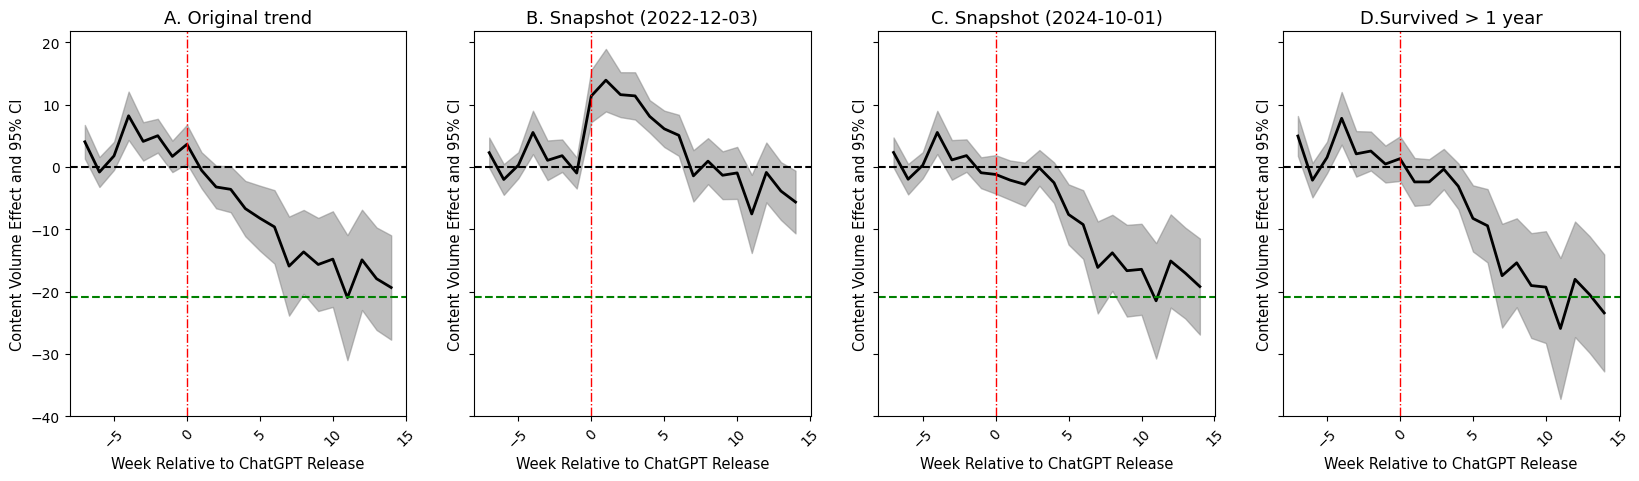

In [26]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(origin_output['period'], origin_output['ll_95'], origin_output['ul_95'], color='gray', alpha=0.5)
axs[0].plot(origin_output['period'], origin_output['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("A. Original trend", fontsize=13)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond2_n_output['period'], cond2_n_output['ll_95'], cond2_n_output['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond2_n_output['period'], cond2_n_output['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
# axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("B. Snapshot (2022-12-03)", fontsize=13)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

axs[2].fill_between(cond1_n_output['period'], cond1_n_output['ll_95'], cond1_n_output['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond1_n_output['period'], cond1_n_output['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
# axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("C. Snapshot (2024-10-01)", fontsize=13)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)


axs[3].fill_between(cond3_n_output['period'], cond3_n_output['ll_95'], cond3_n_output['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_n_output['period'], cond3_n_output['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
# axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("D.Survived > 1 year", fontsize=13)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();